# Ollama Deep Researcher (Deepseek-R1)

- Author: [Youngin Kim](https://github.com/Normalist-K)
- Design: 
- Peer Review: 
- This is a part of [LangChain Open Tutorial](https://github.com/LangChain-OpenTutorial/LangChain-OpenTutorial)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/LangChain-OpenTutorial/LangChain-OpenTutorial/blob/main/99-TEMPLATE/00-BASE-TEMPLATE-EXAMPLE.ipynb) [![Open in GitHub](https://img.shields.io/badge/Open%20in%20GitHub-181717?style=flat-square&logo=github&logoColor=white)](https://github.com/LangChain-OpenTutorial/LangChain-OpenTutorial/blob/main/99-TEMPLATE/00-BASE-TEMPLATE-EXAMPLE.ipynb)

## Overview

This tutorial explores how to **build a fully local AI-powered research agent** using **Ollama** and **Deepseek-R1** , an open-source large language model. The research agent is designed based on **Iterative Demonstration-Based Retrieval-Augmented Generation (IterDRAG)** , a methodology that enhances complex query resolution through **iterative query decomposition, retrieval, and synthesis** . By leveraging this structured approach, we can enable AI to **autonomously refine queries, retrieve relevant documents, and synthesize  high-quality research outputs** — all while running **entirely on your local machine** .

**DISCLAIMER** : This tutorial code is heavily based on **Ollama Deep Researcher** [link](https://github.com/langchain-ai/ollama-deep-researcher).

### Key Technologies
- **[Ollama](https://ollama.com)** : A local runtime for efficiently running open-source LLMs.
- **[Deepseek-R1](https://github.com/deepseek-ai/DeepSeek-R1)** : A powerful open-source model optimized for reasoning and research.
- **[IterDRAG (Iterative Demonstration-Based RAG)](https://arxiv.org/html/2410.04343v1#:~:text=To%20tackle%20this%20issue%2C%20we,used%20to%20generate%20intermediate%20answers.)** : A retrieval and generation method that improves AI-driven research by **breaking down complex queries into manageable sub-queries, retrieving relevant context, and synthesizing iterative answers** .

---

### **What You’ll Learn**
🔹 **How to set up Ollama & Deepseek-R1 for local AI research**  
🔹 **How to optimize Deepseek-R1 models**  
🔹 **How to implement an IterDRAG-based research workflow**  


By the end of this tutorial, you’ll be able to **build a fully local, AI-enhanced research agent** that applies **IterDRAG principles** to enable **incremental knowledge refinement, retrieval-aware generation, and dynamic query optimization**—all while maintaining full **privacy, speed, and control** over the research process. 🚀

### Table of Contents

- [Overview](#overview)
- [Environment Setup](#environment-setup)
- [Getting Started with Ollama and DeepSeek-R1](#getting-started-with-ollama-and-deepseek-r1)
- [Using ChatOllama with DeepSeek-R1](#using-chatollama-with-deepseek-r1)
- [Using DeepSeek-R1](#using-deepseek-r1)
- [Ollama Deep Researcher powered by IterDRAG](#ollama-deep-researcher-powered-by-iterdrag)
- [Defining the Deep Researcher Nodes](#defining-the-deep-researcher-nodes)
- [Running the Deep Researcher Graph](#running-the-deep-researcher-graph)

### References

- [LangChain](https://blog.langchain.dev/)
- [ollama-deep-researcher](https://github.com/langchain-ai/ollama-deep-researcher)
- [Ollama](https://ollama.com)
- [Deepseek-R1](https://github.com/deepseek-ai/DeepSeek-R1)
- [IterDRAG (Iterative Demonstration-Based RAG)](https://arxiv.org/html/2410.04343v1#:~:text=To%20tackle%20this%20issue%2C%20we,used%20to%20generate%20intermediate%20answers.)
- [substratus's blog](https://www.substratus.ai/blog/calculating-gpu-memory-for-llm)
- [Language Models & Co.](https://newsletter.languagemodels.co/p/the-illustrated-deepseek-r1?utm_campaign=post&utm_medium=web)

----

## Environment Setup

Setting up your environment is the first step. See the [Environment Setup](https://wikidocs.net/257836) guide for more details.


**[Note]**

The langchain-opentutorial is a package of easy-to-use environment setup guidance, useful functions and utilities for tutorials.
Check out the  [`langchain-opentutorial`](https://github.com/LangChain-OpenTutorial/langchain-opentutorial-pypi) for more details.

In [1]:
%%capture --no-stderr
%pip install langchain-opentutorial

In [2]:
# Install required packages
from langchain_opentutorial import package

package.install(
    [
        "langsmith",
        "langchain",
        "langgraph",
        "langchain_core",
        "langchain-ollama",
        "langchain_community",
        "tavily-python",
    ],
    verbose=False,
    upgrade=False,
)

You can set API keys in a ` .env` file or set them manually.

[Note] If you’re not using the ` .env` file, no worries! Just enter the keys directly in the cell below, and you’re good to go.

In [3]:
from dotenv import load_dotenv
from langchain_opentutorial import set_env

# Attempt to load environment variables from a .env file; if unsuccessful, set them manually.
if not load_dotenv():
    set_env(
        {
            "OPENAI_API_KEY": "",
            "LANGCHAIN_API_KEY": "",
            "LANGCHAIN_TRACING_V2": "true",
            "LANGCHAIN_ENDPOINT": "https://api.smith.langchain.com",
            "LANGCHAIN_PROJECT": "LangGraph-Ollama-Deep-Researcher",
        }
    )

## Getting Started with Ollama and DeepSeek-R1

Ollama allows us to run **Deepseek-R1** (or other models) **directly on a local machine** , removing the need for cloud-based APIs.  
- The model can be accessed via:  
  ✅ **`ollama` command-line interface**  
  ✅ **LangChain’s `ChatOllama` class** , enabling structured AI workflows  
- Supports multiple output formats, including **text, JSON, and multimodal outputs**  

By using **Ollama** to serve Deepseek-R1, we can execute this **entire workflow locally** , ensuring **privacy, efficiency, and full control** over the research process.

---

### Step 1: Install Ollama

Ollama is available for macOS, Linux, and Windows. You can download and install it from the official website:

🔗 **[Download Ollama](https://ollama.com/download)**

Once installed, verify that Ollama is working by running the following command in your terminal:

```sh
$ ollama --version
```
If the installation was successful, this command should return the installed Ollama version.

---

### Step 2: Download DeepSeek-R1 Models

After installing Ollama, you can download a DeepSeek-R1 model. These models vary in size, so it’s important to check your GPU memory before selecting one.

To pull a model, use:
```sh
$ ollama pull deepseek-r1:8b
```

This command will download the 8 billion parameter model (8B), which we tested on a MacBook Pro M1 (16GB RAM) and confirmed to be working properly.

💡 If you experience performance issues, consider using a smaller model, depending on your hardware.

---

### Check GPU Memory Requirements

[Ollama's DeepSeek-R1 models](https://ollama.com/library/deepseek-r1:8b) support Q4_K_M quantization, which reduces the required GPU memory by compressing the model to 4-bit precision.

You can use the table below to determine if your hardware can support a particular model.
For most users, 4-bit precision (Q4_K_M) is the recommended setting.

📌 Calculation Formula:
Refer to [this blog post](https://www.substratus.ai/blog/calculating-gpu-memory-for-llm) for details on how GPU memory is estimated.

| Model Parameters | 16-bit Precision | 8-bit Precision | 4-bit Precision |
|:----------------:|:----------------:|:---------------:|:---------------:|
| 1.5 billion      | ~3.6 GB          | ~1.8 GB         | ~0.9 GB         |
| 7 billion        | ~16.8 GB         | ~8.4 GB         | ~4.2 GB         |
| 8 billion        | ~19.2 GB         | ~9.6 GB         | ~4.8 GB         |
| 14 billion       | ~33.6 GB         | ~16.8 GB        | ~8.4 GB         |
| 32 billion       | ~76.8 GB         | ~38.4 GB        | ~19.2 GB        |
| 70 billion       | ~168.0 GB        | ~84.0 GB        | ~42.0 GB        |
| 671 billion      | ~1610.4 GB       | ~805.2 GB       | ~402.6 GB       |

## Using ChatOllama with DeepSeek-R1

In this section, we'll explore how to utilize the `ChatOllama` class with the **deepseek-r1** model to generate web search queries in JSON format. Additionally, we'll delve into the use of `<think>` tags in **deepseek-r1** to structure the model's reasoning process.

This tutorial does not cover the basics of **Ollama** and `ChatOllama` . 

If you need more information, please refer to the following tutorial: **"/04-MODEL/10-Ollama.ipynb"**

### Generating Web Search Queries in JSON Format

To generate structured search queries, we can prompt **deepseek-r1** to output responses in JSON format. This ensures that the generated queries are well-structured and easy to parse in automated workflows.

When requesting search queries, you can specify the format explicitly, ensuring that the AI returns a properly formatted JSON object. This is useful for integrating AI-generated search queries into research pipelines.

In [4]:
import json
from langchain_ollama import ChatOllama


search_query_prompt = """Your goal is to generate targeted web search query.

The query will gather information related to a specific topic.

Topics: {topics}

Return your query as a JSON object:
{{
    "query": "string",
    "aspect": "string",
    "retionale": "string"
}}
"""

llm_json_mode = ChatOllama(model="deepseek-r1:8b", temperature=0.6, format="json")

msg = llm_json_mode.invoke(search_query_prompt.format(topics="cat"))
query = json.loads(msg.content)
query

{'query': 'how does cat communicate with each other',
 'aspect': 'communication',
 'rationale': 'Understanding how cats communicate can help in better interacting with them and providing appropriate care.'}

## Using DeepSeek-R1

This section provides an overview of **how to use DeepSeek-R1 effectively** and follow the **recommended best practices** outlined by its authors. We'll also introduce the **\<think> tags** , explain their purpose, and mention a workaround for removing them from agent outputs.

In this tutorial, we will not cover DeepSeek's **architecture or training methodology** .  

If you need more information, please refer to [this blog](https://newsletter.languagemodels.co/p/the-illustrated-deepseek-r1?utm_campaign=post&utm_medium=web).

### Recommended Usage Guidelines
To achieve optimal performance with DeepSeek-R1, [the model's authors](https://github.com/deepseek-ai/DeepSeek-R1?tab=readme-ov-file#usage-recommendations) recommend the following configurations:

- **Set temperature between 0.5 and 0.7** (0.6 is recommended) to ensure coherent responses and prevent repetition.
- **Do not use system prompts.** Instead, provide all instructions within the user prompt.
- **For mathematical problems, explicitly instruct the model** to reason step by step and format the final answer using `\boxed{}` .
- **Encourage structured reasoning** by ensuring the model starts its response with `<think>\n` , as it may sometimes omit its reasoning process.

Following these recommendations will help maintain **consistency and accuracy** when using DeepSeek-R1.

---

Below are code examples comparing cases **without** and **with** the recommended usage guidelines.  

Not following the guidelines does not necessarily lead to poor results, but these examples are provided to illustrate the impact of using best practices.

In [5]:
from pprint import pprint


llm = ChatOllama(model="deepseek-r1:8b", temperature=1.5)
msg = llm.invoke("What is capital of Korea")
pprint(msg.content)

'<think>\n\n</think>\n\nThe capital of South Korea is **Seoul** (서울).'


In [6]:
llm = ChatOllama(model="deepseek-r1:8b", temperature=0.6)
msg = llm.invoke("What is capital of Korea")
pprint(msg.content)

'<think>\n\n</think>\n\nThe capital of Korea is **Seoul**.'


In [7]:
import json
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.runnables import RunnableConfig
from langchain_ollama import ChatOllama


query_writer_instructions = """Your goal is to generate a targeted web search query.
The query will gather information related to a specific topic.

<TOPIC>
{research_topic}
</TOPIC>

<FORMAT>
Format your response as a JSON object with ALL three of these exact keys:
   - "query": The actual search query string
   - "aspect": The specific aspect of the topic being researched
   - "rationale": Brief explanation of why this query is relevant
</FORMAT>

<EXAMPLE>
Example output:
{{
    "query": "machine learning transformer architecture explained",
    "aspect": "technical architecture",
    "rationale": "Understanding the fundamental structure of transformer models"
}}
</EXAMPLE>

Provide your response in JSON format:"""


# Format the prompt
query_writer_instructions_formatted = query_writer_instructions.format(
    research_topic="cat vs. dog"
)

# Generate a query
llm_json_mode = ChatOllama(
    model="deepseek-r1:8b",
    temperature=0.6,
    format="json",
)
result = llm_json_mode.invoke(
    [
        SystemMessage(content=query_writer_instructions_formatted),
        HumanMessage(content=f"Generate a query for web search:"),
    ]
)
query = json.loads(result.content)
query

{'query': 'cat vs dog behavior comparison',
 'aspect': 'behavioral differences',
 'rationale': 'To understand how cats and dogs differ in their behaviors and characteristics.'}

In [8]:
result = llm_json_mode.invoke(
    [
        HumanMessage(
            content=f"{query_writer_instructions_formatted} \n\n Generate a query for web search:"
        )
    ]
)
query = json.loads(result.content)
query

{'query': 'cat vs dog comparison',
 'aspect': 'animal behavior',
 'rationale': 'To understand the differences in behavior and characteristics between cats and dogs.'}

In [9]:
math_problem = """Problem:
There are 35 candies and 4 children. Each child must receive the same number of candies, and all candies must be distributed.
	1.	How many candies does each child get?
	2.	How many candies are left after the distribution?
"""

In [10]:
msg = llm.invoke(math_problem)
pprint(msg.content)

('<think>\n'
 'First, I need to determine how many candies each child can receive when '
 'distributing 35 candies among 4 children equally.\n'
 '\n'
 "To do this, I'll divide the total number of candies by the number of "
 "children: 35 ÷ 4 = 8.75. Since it's not possible to have a fraction of a "
 'candy, I recognize that we need to adjust the distribution to ensure all '
 'candies are used up and each child receives an equal whole number.\n'
 '\n'
 'To resolve this, one child will receive 9 candies while the remaining three '
 'children will receive 8 candies each. This way, the total distributed is 9 + '
 '3 × 8 = 35 candies, which uses up all available candies.\n'
 '\n'
 "Next, I'll address how many candies are left after the distribution. Since "
 'all 35 candies have been given out to the children, there are no leftovers '
 'remaining.\n'
 '</think>\n'
 '\n'
 '**Solution:**\n'
 '\n'
 'We need to distribute **35 candies** among **4 children** such that each '
 'child receives the

In [11]:
math_problem_instruction = f"""Answer the below problem. 
Please reason step by step, and put your final answer within \\boxed{{}}.
{math_problem}
"""

msg = llm.invoke(math_problem_instruction)
pprint(msg.content)

('<think>\n'
 'I need to determine how many candies each child receives when there are 35 '
 'candies and 4 children.\n'
 '\n'
 "First, I'll divide the total number of candies by the number of children: 35 "
 '÷ 4 = 8.75.\n'
 '\n'
 "Since each child must receive an equal whole number of candies, I can't have "
 "a fraction of a candy. Therefore, I'll round down to the nearest whole "
 'number, which is 8 candies per child.\n'
 '\n'
 "Next, I'll calculate how many candies are left after distributing 8 candies "
 'to each child: 35 - (4 × 8) = 35 - 32 = 3 candies remaining.\n'
 '</think>\n'
 '\n'
 '**Solution:**\n'
 '\n'
 'We need to distribute **35 candies** among **4 children** such that each '
 'child receives the same number of candies, and all candies are distributed.\n'
 '\n'
 '### Step 1: Determine How Many Candies Each Child Receives\n'
 'To find out how many candies each child gets, divide the total number of '
 'candies by the number of children:\n'
 '\n'
 '\\[\n'
 '\\text{Cand

### **What Are `<think>` Tags?**
DeepSeek-R1 utilizes **structured reasoning** through `<think>` tags. These tags encapsulate the model’s internal thought process before delivering a final answer.

The `<think>` tags exist because of the **way DeepSeek-R1 was trained**:
-  **Reinforcement Learning (RL) for Reasoning Tasks:** During training, the model was rewarded for explicitly stating its thought process within `<think>` tags.

---

### **Handling `<think>` Tags in Outputs**
While `<think>` tags enhance interpretability, there are cases where you may **want to remove them** for cleaner output in applications.

The following code is a hack to remove the `<think>` tags from the output.

In [12]:
think_output = msg.content

while "<think>" in think_output and "</think>" in think_output:
    start = think_output.find("<think>")
    end = think_output.find("</think>") + len("</think>")
    think_output = think_output[:start] + think_output[end:]
    think_output = think_output.strip()

pprint(think_output)

('**Solution:**\n'
 '\n'
 'We need to distribute **35 candies** among **4 children** such that each '
 'child receives the same number of candies, and all candies are distributed.\n'
 '\n'
 '### Step 1: Determine How Many Candies Each Child Receives\n'
 'To find out how many candies each child gets, divide the total number of '
 'candies by the number of children:\n'
 '\n'
 '\\[\n'
 '\\text{Candies per child} = \\frac{\\text{Total Candies}}{\\text{Number of '
 'Children}} = \\frac{35}{4} = 8.75\n'
 '\\]\n'
 '\n'
 'Since each child must receive a whole number of candies, we **round down** '
 'to the nearest whole number:\n'
 '\n'
 '\\[\n'
 '\\text{Candies per child} = 8\n'
 '\\]\n'
 '\n'
 '### Step 2: Calculate the Remaining Candies After Distribution\n'
 'Subtract the total number of candies distributed from the original total:\n'
 '\n'
 '\\[\n'
 '\\text{Remaining Candies} = \\text{Total Candies} - (\\text{Number of '
 'Children} \\times \\text{Candies per Child}) \n'
 '\\]\n'
 '\n'
 '

## Ollama Deep Researcher powered by IterDRAG

### Why IterDRAG for Research?

Research queries often require **multi-hop reasoning** , meaning a single AI-generated answer is insufficient for complex topics. **IterDRAG addresses this challenge** by:  

✅ **Decomposing complex research topics** into structured sub-queries  
✅ **Iteratively retrieving, summarizing, and refining** relevant documents  
✅ **Generating intermediate answers** for each sub-query before final synthesis  
✅ **Scaling up knowledge extraction** by incorporating multiple iterations of retrieval  


This tutorial introduces a **modular research agent** designed to iteratively refine research queries and synthesize structured reports. The research process follows an **IterDRAG-based methodology** , ensuring thorough information retrieval and refinement through multiple iterations.

---

### How the Ollama Deep Researcher Works
1. **Query Generation** → The AI **generates an initial web search query** based on the research topic.
2. **Web Research** → The agent **fetches relevant documents** using a search API (Tavily or Perplexity).
3. **Summarization** → Retrieved documents are **summarized into a structured format** for further analysis.
4. **Reflection & Knowledge Gap Detection** → The agent **analyzes knowledge gaps** and **generates a follow-up query** if needed.
5. **Iterative Research Loop** → Steps 2–4 are **repeated up to a set number of times** to refine the research.
6. **Final Report Generation** → Once the loop limit is reached, the agent **compiles all gathered insights and sources into a structured report** .

---

### Configuration & State management

Before constructing the graph, let’s first define the configuration and state. 

For the configuration,
- `Configuration` manages customizable settings such as the number of research iterations ( `max_web_research_loops` ) and the choice of the local LLM model (e.g., `deepseek-r1:8b` ).
- The `from_runnable_config` method allows dynamic configuration loading from environment variables or provided settings.

In [13]:
import os
from dataclasses import dataclass, fields
from typing import Any, Optional
from langchain_core.runnables import RunnableConfig
from langchain_opentutorial.messages import random_uuid


@dataclass(kw_only=True)
class Configuration:
    """The configurable fields for the research assistant."""

    max_web_research_loops: int = 3
    local_llm: str = "deepseek-r1:8b"  # 1.5b, 7b, 8b, 14b, 32b, 70b, 671b

    @classmethod
    def from_runnable_config(
        cls, config: Optional[RunnableConfig] = None
    ) -> "Configuration":
        """Create a Configuration instance from a RunnableConfig."""
        configurable = (
            config["configurable"] if config and "configurable" in config else {}
        )
        values: dict[str, Any] = {
            f.name: os.environ.get(f.name.upper(), configurable.get(f.name))
            for f in fields(cls)
            if f.init
        }
        return cls(**{k: v for k, v in values.items() if v})

For state management, 
- `SummaryState` keeps track of the research process, including the topic, search queries, gathered sources, and the final summary.
- It also defines `SummaryStateInput` and `SummaryStateOutput` to structure input and output data clearly.

In [14]:
import operator
from dataclasses import dataclass, field
from typing_extensions import Annotated


@dataclass(kw_only=True)
class SummaryState:
    research_topic: str = field(default=None)  # Report topic
    search_query: str = field(default=None)  # Search query
    web_research_results: Annotated[list, operator.add] = field(default_factory=list)
    sources_gathered: Annotated[list, operator.add] = field(default_factory=list)
    research_loop_count: int = field(default=0)  # Research loop count
    running_summary: str = field(default=None)  # Final report


@dataclass(kw_only=True)
class SummaryStateInput:
    research_topic: str = field(default=None)  # Report topic


@dataclass(kw_only=True)
class SummaryStateOutput:
    running_summary: str = field(default=None)  # Final report

## Defining the Deep Researcher Nodes

Now, let’s build the graph.

First, we’ll define the five core nodes that make up the **Ollama Deep Researcher** . These nodes represent key stages of the research process. Once the nodes are defined, we’ll connect them with edges to form a structured graph workflow that guides the research execution step by step.

Here are the five core nodes:

- `generate_query` : Generates an initial web search query based on the research topic.  
- `web_research` : Searches the web using the generated query and retrieves relevant information.  
- `summarize_sources` : Summarizes the gathered sources into a structured format.  
- `reflect_on_summary` : Identifies knowledge gaps and formulates a follow-up query if needed.  
- `finalize_summary` : Compiles all findings into a well-structured final research report.  

![graph](./assets/14-langgraph-ollama-deep-researcher-deepseek.png)

### Node to generate a query for web search

**Generating the Search Query**  
- The agent **constructs an optimized web search query** using `ChatOllama` in JSON format.  
- It ensures that the generated query is structured for efficient retrieval.

In [15]:
import json
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.runnables import RunnableConfig
from langchain_ollama import ChatOllama


query_writer_instructions = """Your goal is to generate a targeted web search query.
The query will gather information related to a specific topic.

<TOPIC>
{research_topic}
</TOPIC>

<FORMAT>
Format your response as a JSON object with ALL three of these exact keys:
   - "query": The actual search query string
   - "aspect": The specific aspect of the topic being researched
   - "rationale": Brief explanation of why this query is relevant
</FORMAT>

<EXAMPLE>
Example output:
{{
    "query": "machine learning transformer architecture explained",
    "aspect": "technical architecture",
    "rationale": "Understanding the fundamental structure of transformer models"
}}
</EXAMPLE>

Provide your response in JSON format:"""


def generate_query(state: SummaryState, config: RunnableConfig):
    """Generate a query for web search"""

    # Format the prompt
    query_writer_instructions_formatted = query_writer_instructions.format(
        research_topic=state.research_topic
    )

    # Generate a query
    configurable = Configuration.from_runnable_config(config)
    llm_json_mode = ChatOllama(
        model=configurable.local_llm,
        temperature=0.6,
        format="json",
    )
    result = llm_json_mode.invoke(
        [
            HumanMessage(
                content=f"{query_writer_instructions_formatted}\n\nGenerate a query for web search:"
            ),
        ]
    )
    query = json.loads(result.content)

    return {"search_query": query["query"]}

### Node to conduct web search using Tavily

**Conducting Web Research**  
- The system fetches information using either **Tavily** or **Perplexity** search APIs.  
- The search results are **formatted and deduplicated** to ensure high-quality input.

In [16]:
from langsmith import traceable
from tavily import TavilyClient


def deduplicate_and_format_sources(
    search_response, max_tokens_per_source, include_raw_content=False
):
    """
    Takes either a single search response or list of responses from search APIs and formats them.
    Limits the raw_content to approximately max_tokens_per_source.
    include_raw_content specifies whether to include the raw_content from Tavily in the formatted string.

    Args:
        search_response: Either:
            - A dict with a 'results' key containing a list of search results
            - A list of dicts, each containing search results

    Returns:
        str: Formatted string with deduplicated sources
    """
    # Convert input to list of results
    if isinstance(search_response, dict):
        sources_list = search_response["results"]
    elif isinstance(search_response, list):
        sources_list = []
        for response in search_response:
            if isinstance(response, dict) and "results" in response:
                sources_list.extend(response["results"])
            else:
                sources_list.extend(response)
    else:
        raise ValueError(
            "Input must be either a dict with 'results' or a list of search results"
        )

    # Deduplicate by URL
    unique_sources = {}
    for source in sources_list:
        if source["url"] not in unique_sources:
            unique_sources[source["url"]] = source

    # Format output
    formatted_text = "Sources:\n\n"
    for i, source in enumerate(unique_sources.values(), 1):
        formatted_text += f"Source {source['title']}:\n===\n"
        formatted_text += f"URL: {source['url']}\n===\n"
        formatted_text += (
            f"Most relevant content from source: {source['content']}\n===\n"
        )
        if include_raw_content:
            # Using rough estimate of 4 characters per token
            char_limit = max_tokens_per_source * 4
            # Handle None raw_content
            raw_content = source.get("raw_content", "")
            if raw_content is None:
                raw_content = ""
                print(f"Warning: No raw_content found for source {source['url']}")
            if len(raw_content) > char_limit:
                raw_content = raw_content[:char_limit] + "... [truncated]"
            formatted_text += f"Full source content limited to {max_tokens_per_source} tokens: {raw_content}\n\n"

    return formatted_text.strip()


def format_sources(search_results):
    """Format search results into a bullet-point list of sources.

    Args:
        search_results (dict): Tavily search response containing results

    Returns:
        str: Formatted string with sources and their URLs
    """
    return "\n".join(
        f"* {source['title']} : {source['url']}" for source in search_results["results"]
    )


@traceable
def tavily_search(query, include_raw_content=True, max_results=3):
    """Search the web using the Tavily API.

    Args:
        query (str): The search query to execute
        include_raw_content (bool): Whether to include the raw_content from Tavily in the formatted string
        max_results (int): Maximum number of results to return

    Returns:
        dict: Search response containing:
            - results (list): List of search result dictionaries, each containing:
                - title (str): Title of the search result
                - url (str): URL of the search result
                - content (str): Snippet/summary of the content
                - raw_content (str): Full content of the page if available"""

    tavily_client = TavilyClient()
    return tavily_client.search(
        query, max_results=max_results, include_raw_content=include_raw_content
    )


def web_research(state: SummaryState, config: RunnableConfig):
    """Gather information from the web"""

    # Search the web
    search_results = tavily_search(
        state.search_query, include_raw_content=True, max_results=1
    )
    search_str = deduplicate_and_format_sources(
        search_results, max_tokens_per_source=1000, include_raw_content=True
    )

    return {
        "sources_gathered": [format_sources(search_results)],
        "research_loop_count": state.research_loop_count + 1,
        "web_research_results": [search_str],
    }

### Node to summarize the web search results

**Summarizing the Findings**  
- The AI **extracts key insights** from retrieved documents.  
- It **removes redundant information** and maintains coherence across iterations.

In [17]:
summarizer_instructions = """
<GOAL>
Generate a high-quality summary of the web search results and keep it concise / related to the user topic.
</GOAL>

<REQUIREMENTS>
When creating a NEW summary:
1. Highlight the most relevant information related to the user topic from the search results
2. Ensure a coherent flow of information

When EXTENDING an existing summary:                                                                                                                 
1. Read the existing summary and new search results carefully.                                                    
2. Compare the new information with the existing summary.                                                         
3. For each piece of new information:                                                                             
    a. If it's related to existing points, integrate it into the relevant paragraph.                               
    b. If it's entirely new but relevant, add a new paragraph with a smooth transition.                            
    c. If it's not relevant to the user topic, skip it.                                                            
4. Ensure all additions are relevant to the user's topic.                                                         
5. Verify that your final output differs from the input summary.                                                                                                                                                            
< /REQUIREMENTS >

< FORMATTING >
- Start directly with the updated summary, without preamble or titles. Do not use XML tags in the output.  
< /FORMATTING >"""


def summarize_sources(state: SummaryState, config: RunnableConfig):
    """Summarize the gathered sources"""

    # Existing summary
    existing_summary = state.running_summary

    # Most recent web research
    most_recent_web_research = state.web_research_results[-1]

    # Build the human message
    if existing_summary:
        human_message_content = (
            f"<User Input> \n {state.research_topic} \n <User Input>\n\n"
            f"<Existing Summary> \n {existing_summary} \n <Existing Summary>\n\n"
            f"<New Search Results> \n {most_recent_web_research} \n <New Search Results>"
        )
    else:
        human_message_content = (
            f"<User Input> \n {state.research_topic} \n <User Input>\n\n"
            f"<Search Results> \n {most_recent_web_research} \n <Search Results>"
        )

    # Run the LLM
    configurable = Configuration.from_runnable_config(config)
    llm = ChatOllama(model=configurable.local_llm, temperature=0.6)
    result = llm.invoke(
        [
            HumanMessage(
                content=f"{summarizer_instructions}\n\n{human_message_content}"
            ),
        ]
    )

    running_summary = result.content

    # TODO: This is a hack to remove the <think> tags w/ Deepseek models
    # It appears very challenging to prompt them out of the responses
    while "<think>" in running_summary and "</think>" in running_summary:
        start = running_summary.find("<think>")
        end = running_summary.find("</think>") + len("</think>")
        running_summary = running_summary[:start] + running_summary[end:]

    return {"running_summary": running_summary}

### Node to generate a refined query reflecting a existing summary

**Refining Through Reflection**  
- The model **analyzes knowledge gaps** in the existing summary.  
- If necessary, it **generates a refined follow-up query** to gather missing information.

In [18]:
reflection_instructions = """You are an expert research assistant analyzing a summary about {research_topic}.

<GOAL>
1. Identify knowledge gaps or areas that need deeper exploration
2. Generate a follow-up question that would help expand your understanding
3. Focus on technical details, implementation specifics, or emerging trends that weren't fully covered
</GOAL>

<REQUIREMENTS>
Ensure the follow-up question is self-contained and includes necessary context for web search.
</REQUIREMENTS>

<FORMAT>
Format your response as a JSON object with these exact keys:
- knowledge_gap: Describe what information is missing or needs clarification
- follow_up_query: Write a specific question to address this gap
</FORMAT>

<EXAMPLE>
Example output:
{{
    "knowledge_gap": "The summary lacks information about performance metrics and benchmarks",
    "follow_up_query": "What are typical performance benchmarks and metrics used to evaluate [specific technology]?"
}}
</EXAMPLE>

Provide your analysis in JSON format:"""


def reflect_on_summary(state: SummaryState, config: RunnableConfig):
    """Reflect on the summary and generate a follow-up query"""

    # Generate a query
    configurable = Configuration.from_runnable_config(config)
    llm_json_mode = ChatOllama(
        model=configurable.local_llm, temperature=0.6, format="json"
    )
    content = f"""{reflection_instructions.format(research_topic=state.research_topic)}
    Identify a knowledge gap and generate a follow-up web search query based on our existing knowledge: {state.running_summary}
    """
    result = llm_json_mode.invoke(
        [
            HumanMessage(content=content),
        ]
    )
    follow_up_query = json.loads(result.content)

    # Get the follow-up query
    query = follow_up_query.get("follow_up_query")

    # JSON mode can fail in some cases
    if not query:

        # Fallback to a placeholder query
        return {"search_query": f"Tell me more about {state.research_topic}"}

    # Update search query with follow-up query
    return {"search_query": follow_up_query["follow_up_query"]}

### Node to finalize summary

**Finalizing the Summary**  
- The node **compiles all research findings** into a structured report.  
- Sources are formatted into a **bulleted list for transparency** .

In [19]:
def finalize_summary(state: SummaryState):
    """Finalize the summary"""

    # Format all accumulated sources into a single bulleted list
    all_sources = "\n".join(source for source in state.sources_gathered)
    state.running_summary = (
        f"## Summary\n\n{state.running_summary}\n\n ### Sources:\n{all_sources}"
    )
    return {"running_summary": state.running_summary}

### Building the Deep Researcher Graph

Now we'll create the deep researcher graph that orchestrates the research workflow.

In [20]:
from typing_extensions import Literal
from langgraph.graph import START, END, StateGraph
from langgraph.checkpoint.memory import MemorySaver


def route_research(
    state: SummaryState, config: RunnableConfig
) -> Literal["finalize_summary", "web_research"]:
    """Route the research based on the follow-up query"""

    configurable = Configuration.from_runnable_config(config)
    if state.research_loop_count <= configurable.max_web_research_loops:
        return "web_research"
    else:
        return "finalize_summary"


# Add nodes and edges
builder = StateGraph(
    SummaryState,
    input=SummaryStateInput,
    output=SummaryStateOutput,
    config_schema=Configuration,
)
builder.add_node("generate_query", generate_query)
builder.add_node("web_research", web_research)
builder.add_node("summarize_sources", summarize_sources)
builder.add_node("reflect_on_summary", reflect_on_summary)
builder.add_node("finalize_summary", finalize_summary)

# Add edges
builder.add_edge(START, "generate_query")
builder.add_edge("generate_query", "web_research")
builder.add_edge("web_research", "summarize_sources")
builder.add_edge("summarize_sources", "reflect_on_summary")
builder.add_conditional_edges("reflect_on_summary", route_research)
builder.add_edge("finalize_summary", END)

# Create memory
memory = MemorySaver()

graph = builder.compile(checkpointer=memory)

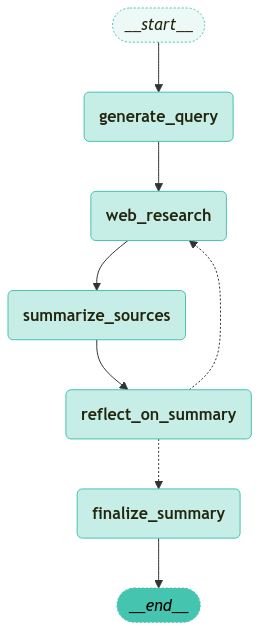

In [21]:
from langchain_opentutorial.graphs import visualize_graph

# Visualize the graph
visualize_graph(graph)

## Running the Deep Researcher Graph

This code runs a research agent using the invoke_graph function. 

It initializes the agent with the DeepSeek-R1 (8B) model, sets a research topic, and configures the agent to perform up to 3 web research iterations. The agent then executes the research workflow, gathering information, summarizing findings, and refining queries automatically. 🚀

[NOTE] This process takes approximately 3 to 5 minutes on an M1 Pro.

In [22]:
from langchain_opentutorial.messages import invoke_graph

topic = "Give me a summary of DeepSeek-r1 model."

inputs = {"research_topic": topic}

config = RunnableConfig(
    configurable={
        "thread_id": random_uuid(),
        "local_llm": "deepseek-r1:8b",
        "max_web_research_loops": 3,
    },
)

invoke_graph(graph, inputs, config)


🔄 Node: generate_query 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
search_query:
DeepSeek-R1 model overview

🔄 Node: web_research 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
* DeepSeek R-1 Model Overview and How it Ranks Against OpenAI's o1 : https://www.prompthub.us/blog/deepseek-r-1-model-overview-and-how-it-ranks-against-openais-o1
research_loop_count:
1
Sources:

Source DeepSeek R-1 Model Overview and How it Ranks Against OpenAI's o1:
===
URL: https://www.prompthub.us/blog/deepseek-r-1-model-overview-and-how-it-ranks-against-openais-o1
===
Most relevant content from source: We’ll then move on to DeepSeek-R1, how it’s reasoning works, and some prompt engineering best practices for reasoning models. DeepSeek-R1-Zero stands out from most other state-of-the-art models because it was trained using only reinforcement learning (RL), no supervised fine-tuning (SFT). The training process for DeepSeek-R1-Zero involved presenting the model with various reasoning tasks, rang

In [23]:
final_state = graph.get_state(config)

Display completed research summary in markdown

In [24]:
from IPython.display import Markdown

Markdown(final_state.values["running_summary"])

## Summary



**DeepSeek-R1 Model Summary**

The DeepSeek-R1 model is an open-source large language model developed by the Chinese company DeepSeek, founded in 2023 by Liang Wenfang. Launched in January 2025, R1 has demonstrated remarkable reasoning capabilities and performance comparable to OpenAI's GPT-4 (o1) in AI reasoning tasks.

**Architecture and Training Techniques**

DeepSeek-R1 is equipped with 671 billion parameters, making it a powerful tool for generating accurate responses. The model employs techniques such as reinforcement learning and chain-of-thought reasoning to enhance its precision and effectiveness. These methods allow R1 to not only match but sometimes surpass the performance of OpenAI's o1 in areas like mathematics, coding, and logical reasoning.

**Performance Metrics**

In benchmarks, DeepSeek-R1 has shown comparable results to OpenAI o1 across various tasks. Its ability to handle complex problem-solving and generate coherent, contextually appropriate responses positions it as a strong competitor in the generative AI market. The model's performance is particularly notable in mathematical computations and coding challenges.

**Cost Advantage**

One of R1's significant strengths is its affordability compared to OpenAI's models. This cost-effectiveness makes R1 accessible to a broader range of applications, including education, research, and industry, where budget constraints are often a limiting factor.

**Impact on AI Market**

The release of R1 underscores the potential of open-source AI models to compete with and even surpass proprietary alternatives like OpenAI's products. This approach not only democratizes access to advanced AI technologies but also challenges traditional monopolies in the AI sector, fostering innovation and competition.

In conclusion, DeepSeek-R1 represents a significant milestone in AI development, offering both powerful performance and accessible solutions. Its impact on the market is expected to be profound, influencing future advancements in generative AI.

 ### Sources:
* DeepSeek R-1 Model Overview and How it Ranks Against OpenAI's o1 : https://www.prompthub.us/blog/deepseek-r-1-model-overview-and-how-it-ranks-against-openais-o1
* The Mathematics Behind DeepSeek-R1 | by Harjot Kaur | Jan, 2025 ... : https://pub.towardsai.net/the-mathematics-behind-deepseek-r1-954102f9b9c6
* DeepSeek-R1: Features, Use Cases, and Comparison with OpenAI : https://www.mygreatlearning.com/blog/deepseek-r1-features-use-cases/
* Can DeepSeek R1 Take On OpenAI o1? Benchmarks Say Yes : https://www.techopedia.com/can-deepseek-r1-take-on-openai-o1